# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [20]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import datetime
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime, timezone
# Import API key
from api_keys import geoapify_key

In [21]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
csv_file = "..\output_data\cities.csv"
city_data_df = pd.read_csv(csv_file)

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

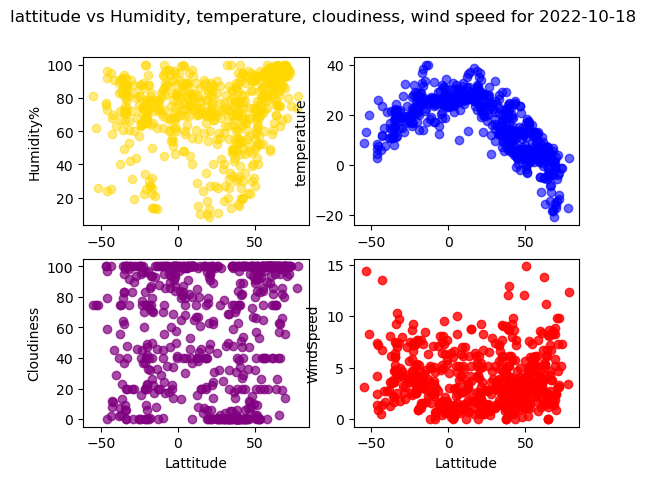

In [14]:
%%capture --no-display
convertdtypes = {"City": 'object',
                            "Lat": 'float',
                            "Lng": 'float',
                            "Max Temp": 'float',
                            "Humidity": 'int',
                            "Cloudiness": 'int',
                            "Wind Speed": 'float',
                            "Country": 'object',
                            "Date": 'string'}
city_data_df.astype(convertdtypes)
date_c= pd.Series(city_data_df["Date"]).array
for i in range(0,len(date_c)):
    DT = pd.to_datetime(date_c[i-1],unit ='s')
    city_data_df["Date"] = DT

#---------------------------------------------------------------------------------------------------------------------------------------------------------#
humidity =pd.Series(city_data_df["Humidity"]).array
latitude =pd.Series(city_data_df["Lat"]).array
longitude =pd.Series(city_data_df["Lng"]).array
temperature = pd.Series(city_data_df["Max Temp"]).array
clouds = pd.Series(city_data_df["Cloudiness"]).array
windspeed = pd.Series(city_data_df["Wind Speed"]).array
# Configure the map plot
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
fig.suptitle("lattitude vs Humidity, temperature, cloudiness, wind speed for 2022-10-18")
ax1.scatter(x = latitude, y = humidity, color= 'gold',alpha = 0.5)
ax2.scatter(x = latitude, y = temperature, color='blue', alpha = 0.6)
ax3.scatter(x = latitude, y = clouds, color='purple', alpha = 0.7)
ax4.scatter(x = latitude, y = windspeed, color='red', alpha = 0.8)
#plt1.set_xlabel("Lattitude")
ax1.set_ylabel("Humidity%")
#plt1.set_title("Humidity Vs Latitude for 2022-10-18")
#plt2.set_xlabel("Lattitude")
ax2.set_ylabel("temperature")
#plt2.set_title("Lattitude VS temperature for 2022-10-18")
ax3.set_xlabel("Lattitude")
ax3.set_ylabel("Cloudiness")
#plt3.set_title("Lattitude vs cloudiness for 2022-10-18")
ax4.set_xlabel("Lattitude")
ax4.set_ylabel("WindSpeed")
#plt4.set_title("Lattitude vs Wind Speed for 2022-10-18")
# Display the map
plt.show()



#Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [15]:
# Narrow down cities that fit criteria and drop any results with null values
Justright_humidity = city_data_df.loc[(city_data_df["Humidity"]>35) & (city_data_df["Humidity"]< 60) ]
    
# Drop any rows with null values
Justright_humidity.dropna()

# Display sample data
Justright_humidity.tail(10)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
495,495,statesville,35.7826,-80.8873,10.76,49,0,4.63,US,2022-10-18 15:56:06
498,498,lahij,13.1667,44.5833,26.32,55,8,2.68,YE,2022-10-18 15:56:06
499,499,derzhavinsk,51.1000,66.3167,6.17,51,92,3.50,KZ,2022-10-18 15:56:06
506,506,sfantu gheorghe,45.8667,25.7833,15.32,51,33,0.92,RO,2022-10-18 15:56:06
526,526,wajima,37.4000,136.9000,13.44,55,14,4.40,JP,2022-10-18 15:56:06
531,531,chivilcoy,-34.8957,-60.0167,22.27,49,83,6.44,AR,2022-10-18 15:56:06
554,554,freeport,40.6576,-73.5832,13.43,46,89,2.24,US,2022-10-18 15:56:06
555,555,bulgan,48.8125,103.5347,5.37,40,67,1.26,MN,2022-10-18 15:56:06
557,557,saryg-sep,51.5000,95.6000,4.70,44,100,1.22,RU,2022-10-18 15:56:06
565,565,wyndham,37.6985,-77.6125,12.81,52,3,1.79,US,2022-10-18 15:56:06


### Step 3: Create a new DataFrame called `hotel_df`.

In [18]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel = Justright_humidity.iloc[:, [0,1,2,3,5,8]]
hotel_df = hotel.copy()
# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df

,City_ID,City,Lat,Lng,Humidity,Country,Hotel Name
2,2,new norfolk,-42.7826,147.0587,58,AU,
4,4,lanzhou,36.0564,103.7922,48,CN,
12,12,trairi,-3.2778,-39.2689,51,BR,
28,28,zangakatun,39.8212,45.0406,55,AM,
34,34,naberera,-4.2000,36.9333,54,TZ,
...,...,...,...,...,...,...,...
531,531,chivilcoy,-34.8957,-60.0167,49,AR,
554,554,freeport,40.6576,-73.5832,46,US,
555,555,bulgan,48.8125,103.5347,40,MN,
557,557,saryg-sep,51.5000,95.6000,44,RU,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [31]:
# Set parameters to search for a hotel
radius = 10000
limit = 20
params = {}
# Print a message to follow up the hotel search
print("Starting hotel search")
# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    latitude = hotel_df.loc[index, "Lat"]
    longitude = hotel_df.loc[index, "Lng"]   
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["categories"]= {f"accommodation.hotel"}
   # params["conditions"]= conditions
    params["filter"] = {f"circle:{longitude},{latitude},{radius}"}
    params["bias"] = {f"proximity:{longitude},{latitude}"}   
    params["limit"]= limit
    params["apiKey"]= geoapify_key 
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
    final_url = f"{base_url}?categories={categories}&filter={filters}&bias={bias}&limit={limit}&apiKey= {geoapify_key}"
    # Make and API request using the params dictionaty
    name_address = requests.get(base_url, params=params)  
    # Convert the API response to JSON format
    response = name_address.json()   
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = response["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"       
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df.head()
response

Starting hotel search
new norfolk - nearest hotel: Woodbridge on the Derwent
lanzhou - nearest hotel: 西园宾馆
trairi - nearest hotel: Pousada Villa Aurora
zangakatun - nearest hotel: No hotel found
naberera - nearest hotel: No hotel found
collierville - nearest hotel: Days Inn & Suites by Wyndham Collierville Germantown Area
cayenne - nearest hotel: Central Hôtel
banda - nearest hotel: #acnindiafy21
rafaela - nearest hotel: Parra Hotel & Suites
saint george - nearest hotel: The Advenire, an Autograph Collection Hotel
arman - nearest hotel: No hotel found
shenjiamen - nearest hotel: Zhonghan Hotel
itarema - nearest hotel: Pousada Oásis
heihe - nearest hotel: Санкт-Петербург
cedar city - nearest hotel: Baymont Inn & Suites
brenham - nearest hotel: Ant Street Inn
almaznyy - nearest hotel: Зверево
aripuana - nearest hotel: No hotel found
sur - nearest hotel: Sur Hotel
la ronge - nearest hotel: La Ronge Hotel and Suites
chunhuhub - nearest hotel: No hotel found
hovd - nearest hotel: Khovd hote

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'name': 'Hilton Richmond Hotel & Spa/Short Pump',
    'country': 'United States',
    'country_code': 'us',
    'state': 'Virginia',
    'county': 'Henrico County',
    'city': 'Richmond',
    'postcode': '23233',
    'street': 'West Broad Street',
    'housenumber': '12042',
    'lon': -77.62821257508803,
    'lat': 37.659362900000005,
    'state_code': 'VA',
    'formatted': 'Hilton Richmond Hotel & Spa/Short Pump, 12042 West Broad Street, Richmond, VA 23233, United States of America',
    'address_line1': 'Hilton Richmond Hotel & Spa/Short Pump',
    'address_line2': '12042 West Broad Street, Richmond, VA 23233, United States of America',
    'categories': ['accommodation',
     'accommodation.hotel',
     'building',
     'building.accommodation',
     'internet_access',
     'internet_access.free',
     'wheelchair',
     'wheelchair.yes'],
    'details': ['details',
     'details.accommodation',
   

In [32]:
final_url 
#response
latitude
longitude
filters
name_address
params

{'categories': {'accommodation.hotel'},
 'filter': {'circle:-77.6125,37.6985,10000'},
 'bias': {'proximity:-77.6125,37.6985'},
 'limit': 20,
 'apiKey': 'e4a92c3278c94f8d8bda0d898ab2bf1f'}

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

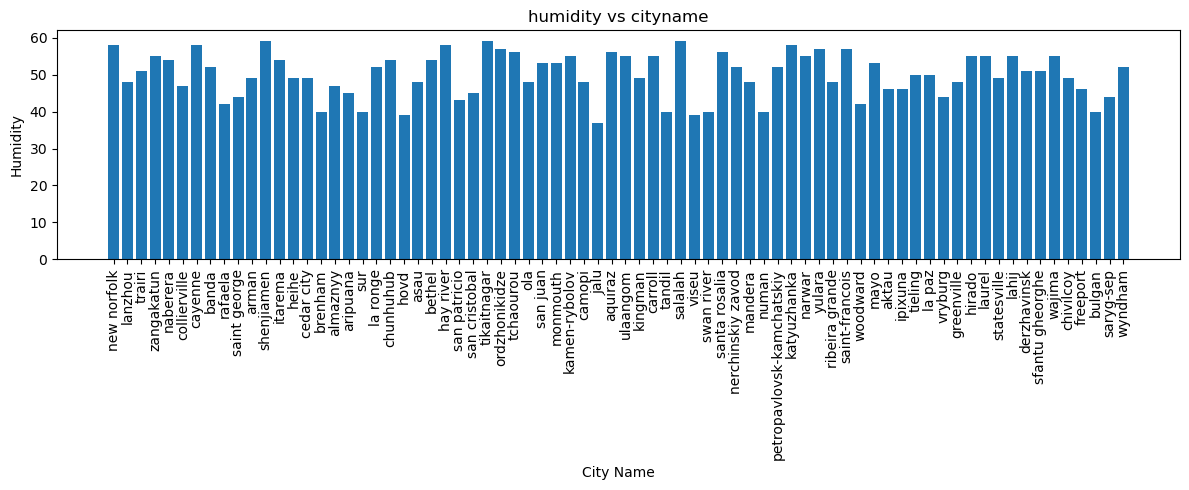

In [61]:
%%capture --no-display
city_name = hotel_df["City"].array
city_country = hotel_df["Country"].array
city_Humidity = hotel_df["Humidity"].array
cityID = hotel_df["City_ID"]
# Configure the map plot
x = city_name
y = city_Humidity
plt.rcParams.update({'figure.autolayout': True})
fig, ax = plt.subplots(figsize =(12, 5))

labels = ax.get_xticklabels()
ax.bar(city_name, city_Humidity,)
plt.setp(labels, rotation=90, horizontalalignment='center')
ax.set(xlabel = 'City Name', ylabel = 'Humidity', title='humidity vs cityname')
# Display the map
plt.show()